In [1]:
import numba

import datetime
import pandas as pd
import numpy as np
import pandas_profiling
import sys
import os

import time
from datetime import date
from datetime import timedelta
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import sklearn.metrics
from random import randrange

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

In [2]:
df = pd.read_csv('HORSES_AIDAN.csv')

C:\Users\ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (547) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
sorted(df.columns.tolist())

['ADJUSTED_RATING',
 'AGE',
 'AMT_BACKED_10_MINS_OUT',
 'AMT_BACKED_1_MIN_OUT',
 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT',
 'AMT_BACKED_30_MINS_OUT',
 'AMT_BACKED_40_MINS_OUT',
 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT',
 'AMT_BACKED_60_MINS_OUT',
 'BACKPRICE',
 'BRED',
 'CLOTH_NUMBER',
 'CLOTH_NUMBER_ALPHA',
 'COLOURS_DESCRIPTION',
 'COLOUR_TYPE',
 'DAMSIRE_BRED',
 'DAMSIRE_NAME',
 'DAMSIRE_YEAR_BORN',
 'DAM_BRED',
 'DAM_NAME',
 'DAM_YEAR_BORN',
 'DAYS_SINCE_LAST_RUN',
 'EXPERIENCE',
 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR',
 'FORECASTPRICE_NUMERATOR',
 'HANDICAP',
 'HORSE_FORM',
 'HORSE_RANKING_BY_PRICE',
 'HORSE_RESULT',
 'JOCKEY_CLAIM',
 'JOCKEY_NAME',
 'LASTMATCHTIME',
 'LASTPRICETRADED',
 'LAST_RACE',
 'LAST_TWO_RACES',
 'LAYPRICE',
 'LIVE_RACE_STATUS',
 'LOSER',
 'MARKETID',
 'MEETING_ID',
 'NUMBEROFACTIVERUNNERS',
 'NUMBEROFRUNNERS',
 'NUMBEROFWINNERS',
 'OFFICIAL_RATING',
 'OFFICIAL_RATING_RANKING',
 'OWNER_NAME',
 'PCT_AMT_BACKED_10_MINS_OUT',
 '

In [17]:
df = pd.read_csv('HORSES_AIDAN.csv')

df = pd.concat([df,pd.get_dummies(df.SEX_TYPE)], axis = 1)

cols = sorted(df.columns.tolist())

for p in cols:
    try:
        df[p].fillna(0.0,inplace=True)
    except:
        pass

In [112]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_10_MINS_OUT', 'AMT_BACKED_1_MIN_OUT', 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT', 'AMT_BACKED_30_MINS_OUT', 'AMT_BACKED_40_MINS_OUT', 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT', 'AMT_BACKED_60_MINS_OUT', 'BACKPRICE', 'DAYS_SINCE_LAST_RUN', 'EXPERIENCE', 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR', 'FORECASTPRICE_NUMERATOR', 'HANDICAP', 'HORSE_RANKING_BY_PRICE', 'HORSE_RESULT', 'JOCKEY_CLAIM',
 'LASTPRICETRADED', 'LOSER', 'NUMBEROFACTIVERUNNERS', 'NUMBEROFRUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_20_MINS_OUT', 'PRICE_20_MINS_OUT_RANKING', 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING', 'PRICE_30_MINS_OUT', 'PRICE_30_MINS_OUT_RANKING', 'PRICE_40_MINS_OUT', 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT', 'PRICE_45_MINS_OUT_RANKING', 'PRICE_5_MINS_OUT', 'PRICE_5_MINS_OUT_RANKING', 'PRICE_60_MINS_OUT',
 'PRICE_60_MINS_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START', 'PRODUCT_OF_ALL_RANKINGS',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'RACE_DISTANCE', 'REMOVED', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING', 'SECOND_LAST_RACE',
 'SEX_TYPE', 'SORT_PRIORITY', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'SUM_OF_NUM_SAMPLES_RANKINGS', 'SUM_SAMPLES_RANKINGS_RANKING', 'TOTALAVAILABLE', 'TOTAL_MATCHED_ON_RACE',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'TRAINER_NAME', 'WEARING', 'WEIGHT_VALUE', 'WINNER',
 'WLR_RANKING', 'WLR_RANKINGS_RANKING', 'WLR_RANKINGS_TOTAL', 'NORM_BACKPRICE', 'AMT_BACKED_10_MINS_OUT_NORM',
 'AMT_BACKED_1_MIN_OUT_NORM', 'AMT_BACKED_20_MINS_OUT_NORM', 'AMT_BACKED_2_SECS_OUT_NORM', 'AMT_BACKED_30_MINS_OUT_NORM', 
 'AMT_BACKED_40_MINS_OUT_NORM', 'AMT_BACKED_45_MINS_OUT_NORM', 'AMT_BACKED_5_MINS_OUT_NORM', 'AMT_BACKED_60_MINS_OUT_NORM']

In [113]:
corrs = df[cols][df[cols].columns[1:]].corr()['WINNER'][:]

In [114]:
corrs.sort_values(ascending=False)

WINNER                           1.000000
TOTAL_MATCHED_ON_RUNNER          0.270244
AMT_BACKED_2_SECS_OUT            0.267539
AMT_BACKED_1_MIN_OUT             0.246541
AMT_BACKED_5_MINS_OUT            0.183357
FORECASTPRICE_DENOMINATOR        0.178795
TOTAL_WLR                        0.128229
AMT_BACKED_30_MINS_OUT           0.119686
AMT_BACKED_20_MINS_OUT           0.113436
AMT_BACKED_40_MINS_OUT           0.109924
AMT_BACKED_45_MINS_OUT           0.107754
AMT_BACKED_60_MINS_OUT           0.102083
AMT_BACKED_10_MINS_OUT           0.092273
AMT_BACKED_2_SECS_OUT_NORM       0.050963
AMT_BACKED_1_MIN_OUT_NORM        0.048210
AMT_BACKED_5_MINS_OUT_NORM       0.046035
AMT_BACKED_10_MINS_OUT_NORM      0.040914
WEIGHT_VALUE                     0.032725
AMT_BACKED_20_MINS_OUT_NORM      0.028265
AMT_BACKED_30_MINS_OUT_NORM      0.026007
AMT_BACKED_60_MINS_OUT_NORM      0.023176
OFFICIAL_RATING                  0.021990
AMT_BACKED_45_MINS_OUT_NORM      0.019256
RACE_DISTANCE                    0

In [13]:
import numba

import datetime
import pandas as pd
import numpy as np
import sys
import os

import time
from datetime import date
from datetime import timedelta
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import sklearn.metrics

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [14]:
from __future__ import absolute_import, division, print_function

#import tensorflow as tf
#from tensorflow import keras

#print(tf.__version__)

from sklearn.model_selection import train_test_split

In [15]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [16]:
@numba.jit#(nopython=True, parallel=True)
def sigmoid(x): 
    return 1.0 / (1.0 + np.exp(list(-x))) # sigmoid "squashing" function to interval [0,1]

#def prepro(I):
#  """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
#  I = I[35:195] # crop
#  #I = I[::2,::2,0] # downsample by factor of 2
#  I[I == 144] = 0 # erase background (background type 1)
#  I[I == 109] = 0 # erase background (background type 2)
#  I[I != 0] = 1 # everything else (paddles, ball) just set to 1
#  return I.astype(np.float).ravel()

#def discount_rewards(r):
#  """ take 1D float array of rewards and compute discounted reward """
#  discounted_r = np.zeros_like(r)
#  running_add = 0
#  for t in reversed(range(0, r.size)):
#    if r[t] != 0: running_add = 0 # reset the sum, since this was a game boundary (pong specific!)
#    running_add = running_add * gamma + r[t]
#    discounted_r[t] = running_add
#  return discounted_r

@numba.jit#(nopython=True, parallel=True)
def policy_forward(x):
    h = np.dot(model_W1, x)
    h[h<0] = np.divide(h[h<0],8) # ReLU nonlinearity set to 0, Leaky RLu set to h/8
    logp = np.dot(model_W2, h)
    p = sigmoid(logp)
    return p, h # return probability of taking action 2, and hidden state

#def policy_backward(eph, epdlogp):
#    """ backward pass. (eph is array of intermediate hidden states) """
#    dW2 = np.dot(eph.T, epdlogp).ravel()
#    dh = np.outer(epdlogp, model['W2'])
#    eph = np.tile (eph, (4,4))
#    dh[eph <= 0] = 0 # backpro prelu
#    #epx = np.tile (epx, (4,4))
#    dW1 = np.dot(dh.T, epx)
#    return {'W1':dW1, 'W2':dW2}

@numba.jit#(nopython=True, parallel=True)
def policy_backward(eph, epdlogp):
    """ backward pass. (eph is array of intermediate hidden states) """
    dW2 = np.dot(eph.T, epdlogp).T#.ravel()
    dh = np.dot(epdlogp, model_W2)
    #eph = np.tile (eph, (4,4))
    dh[eph <= 0] = 0 # backprop relu
    dW1 = np.dot(dh.T, epx)
    return (dW1, dW2)

@numba.jit#(nopython=True, parallel=True)
def allocator(n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,backprice):#,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30):
    x = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n10, backprice]#,n11,n12,n13,n14,n15,n16,n17,n18,n19,n20,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30]
    aprob, h = policy_forward(x)
    #df.idxmax(axis=0, skipna=True)
    
    #c = np.append(np.asarray(pd.get_dummies(df.prev_plan).iloc[0]),-1)
    #exps = [np.exp(i) for i in aprob]
    #sum_of_exps = sum(exps)
    #softmax = np.asarray([j/sum_of_exps for j in exps])
    #one_hot = (aprob == aprob.max(keepdims=True)).astype(int) # don't even need softmax, just pick the biggest, same thing
    action = 0 if np.random.uniform() < aprob else 1 # roll the dice!
    #one_hot = str(one_hot)
    return action

In [18]:
df.head()

,Unnamed: 0,RACE_TRACK,MARKETID,SELECTIONID,RUNNER_NAME,RACE_START_TIME,LIVE_RACE_STATUS,MEETING_ID,RACE_NAME,RACE_DISTANCE,RACE_TYPE,RACE_ID,RACE_STATUS,DAYS_SINCE_LAST_RUN,SEX_TYPE,AGE,SORT_PRIORITY,JOCKEY_NAME,TRAINER_NAME,OWNER_NAME,HORSE_FORM,LAST_RACE,SECOND_LAST_RACE,LAST_TWO_RACES,WEIGHT_VALUE,WEIGHT_UNITS,JOCKEY_CLAIM,WEARING,OFFICIAL_RATING,FORECASTPRICE_DENOMINATOR,FORECASTPRICE_NUMERATOR,SIRE_NAME,SIRE_YEAR_BORN,SIRE_BRED,DAM_NAME,DAM_BRED,DAM_YEAR_BORN,DAMSIRE_NAME,DAMSIRE_YEAR_BORN,DAMSIRE_BRED,STALL_DRAW,ADJUSTED_RATING,CLOTH_NUMBER_ALPHA,COLOURS_DESCRIPTION,CLOTH_NUMBER,COLOUR_TYPE,BRED,RUNNERID,HORSE_RESULT,PROPENSITY,PROPENSITY_RANKING,NUMBEROFWINNERS,NUMBEROFRUNNERS,NUMBEROFACTIVERUNNERS,LASTMATCHTIME,TOTAL_MATCHED_ON_RACE,TOTAL_MATCHED_ON_RUNNER,TOTALAVAILABLE,HANDICAP,RUNNER_STATUS,LASTPRICETRADED,BACKPRICE,LAYPRICE,TIME_OF_CHECK,HORSE_RANKING_BY_PRICE,PRICE_60_MINS_OUT,PRICE_45_MINS_OUT,PRICE_40_MINS_OUT,PRICE_30_MINS_OUT,PRICE_20_MINS_OUT,PRICE_10_MINS_OUT,PRICE_5_MINS_OUT,PRICE_1_MIN_OUT,PRICE_2_SECS_OUT,PCT_PRICE_CHANGE_60M_TO_2S,PCT_PRICE_CHANGE_45M_TO_2S,PCT_PRICE_CHANGE_40M_TO_2S,PCT_PRICE_CHANGE_30M_TO_2S,PCT_PRICE_CHANGE_20M_TO_2S,PCT_PRICE_CHANGE_10M_TO_2S,PCT_PRICE_CHANGE_5M_TO_2S,PCT_PRICE_CHANGE_1M_TO_2S,PRICE_MOVEMENT_SIGNIFICANCE,PMS_RANKING,PRICE_RANKING_AT_RACE_START,AMT_BACKED_60_MINS_OUT,AMT_BACKED_45_MINS_OUT,AMT_BACKED_40_MINS_OUT,AMT_BACKED_30_MINS_OUT,AMT_BACKED_20_MINS_OUT,AMT_BACKED_10_MINS_OUT,AMT_BACKED_5_MINS_OUT,AMT_BACKED_1_MIN_OUT,AMT_BACKED_2_SECS_OUT,PCT_AMT_BACKED_60_MINS_OUT,PCT_AMT_BACKED_45_MINS_OUT,PCT_AMT_BACKED_40_MINS_OUT,PCT_AMT_BACKED_30_MINS_OUT,PCT_AMT_BACKED_20_MINS_OUT,PCT_AMT_BACKED_10_MINS_OUT,PCT_AMT_BACKED_5_MINS_OUT,PCT_AMT_BACKED_1_MIN_OUT,PCT_AMT_BACKED_2_SECS_OUT,PCT_CHANGE_AMT_60M_TO_2S,PCT_CHANGE_AMT_45M_TO_2S,PCT_CHANGE_AMT_40M_TO_2S,PCT_CHANGE_AMT_30M_TO_2S,PCT_CHANGE_AMT_20M_TO_2S,PCT_CHANGE_AMT_10M_TO_2S,PCT_CHANGE_AMT_5M_TO_2S,PCT_CHANGE_AMT_1M_TO_2S,SC_1_JOCKEY,SC_2_PCT_PRICE_CH_1M_TO_2S,SC_3_PCT_BACKED_2_SECS_OUT,SC_4_PCT_CH_AMT_60M_TO_2S,SC_5_PCT_CH_AMT_45M_TO_2S,SC_6_PCT_CH_AMT_40M_TO_2S,SC_7_PCT_CH_AMT_30M_TO_2S,SC_8_PCT_CH_AMT_20M_TO_2S,SC_9_PCT_CH_AMT_10M_TO_2S,SC_10_PCT_CH_AMT_5M_TO_2S,SC_11_PCT_CH_AMT_1M_TO_2S,SC_12_RACE_TRACK,SC_13_RACE_NAME,SC_14_DISTANCE,SC_15_RACE_TYPE,SC_16_DAYS_SINCE_LAST_RUN,SC_17_SEX_TYPE,SC_18_AGE,SC_19_TRAINER,SC_20_OWNER,SC_21_LAST_RACE,SC_22_LAST_TWO_RACES,SC_23_WEIGHT_VALUE,SC_24_JOCKEY_CLAIM,SC_25_WEARING,SC_26_OFFICIAL_RATING,SC_27_SIRE_NAME,SC_28_SIRE_YEAR_BORN,SC_29_SIRE_BRED,SC_30_DAM_NAME,SC_31_DAM_BRED,SC_32_DAM_YEAR_BORN,SC_33_DAMSIRE_NAME,SC_34_DAMSIRE_YEAR_BORN,SC_35_DAMSIRE_BRED,SC_36_STALL_DRAW,SC_37_ADJUSTED_RATING,SC_38_BRED,SC_39_OWNER_TRAINER,...,SC_42_WLR_RANKING,SC_43_WLR_RANKING,SC_44_WLR_RANKING,SC_45_WLR_RANKING,SC_46_WLR_RANKING,SC_47_WLR_RANKING,SC_48_WLR_RANKING,SC_49_WLR_RANKING,SC_50_WLR_RANKING,SC_51_WLR_RANKING,SC_52_WLR_RANKING,SC_53_WLR_RANKING,SC_54_WLR_RANKING,SC_55_WLR_RANKING,SC_56_WLR_RANKING,SC_57_WLR_RANKING,SC_58_WLR_RANKING,SC_59_WLR_RANKING,SC_60_WLR_RANKING,SC_61_WLR_RANKING,SC_62_WLR_RANKING,SC_63_WLR_RANKING,SC_64_WLR_RANKING,SC_65_WLR_RANKING,SC_66_WLR_RANKING,SC_67_WLR_RANKING,SC_68_WLR_RANKING,SC_69_WLR_RANKING,SC_70_WLR_RANKING,WLR_RANKINGS_TOTAL,WLR_RANKINGS_RANKING,SUM_OF_ALL_RANKINGS,PRODUCT_OF_ALL_RANKINGS,SUM_OF_ALL_RANKINGS_RANKING,PROD_OF_ALL_RANKINGS_RANKING,OFFICIAL_RATING_RANKING,EXPERIENCE,EXPERIENCE_RANKING,SC_1_NUM_SAMPLES_RANKING,SC_2_NUM_SAMPLES_RANKING,SC_3_NUM_SAMPLES_RANKING,SC_4_NUM_SAMPLES_RANKING,SC_5_NUM_SAMPLES_RANKING,SC_6_NUM_SAMPLES_RANKING,SC_7_NUM_SAMPLES_RANKING,SC_8_NUM_SAMPLES_RANKING,SC_9_NUM_SAMPLES_RANKING,SC_10_NUM_SAMPLES_RANKING,SC_11_NUM_SAMPLES_RANKING,SC_12_NUM_SAMPLES_RANKING,SC_13_NUM_SAMPLES_RANKING,SC_14_NUM_SAMPLES_RANKING,SC_15_NUM_SAMPLES_RANKING,SC_16_NUM_SAMPLES_RANKING,SC_17_NUM_SAMPLES_RANKING,SC_18_NUM_SAMPLES_RANKING,SC_19_NUM_SAMPLES_RANKING,SC_20_NUM_SAMPLES_RANKING,SC_21_NUM_SAMPLES_RANKING,SC_22_NUM_SAMPL

In [19]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_1_MIN_OUT', 
 'BACKPRICE', 'EXPERIENCE_RANKING', 'HANDICAP', 'HORSE_RANKING_BY_PRICE',
 'LASTPRICETRADED', 'LOSER', 'NUMBEROFACTIVERUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING',
 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'WEIGHT_VALUE',
 'WLR_RANKING', 'WLR_RANKINGS_TOTAL', 'C', 'F', 'G', 'H', 'M', 'R']

In [125]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_10_MINS_OUT', 'AMT_BACKED_1_MIN_OUT', 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT', 'AMT_BACKED_30_MINS_OUT', 'AMT_BACKED_40_MINS_OUT', 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT', 'AMT_BACKED_60_MINS_OUT', 'BACKPRICE', 'DAYS_SINCE_LAST_RUN', 'EXPERIENCE', 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR', 'FORECASTPRICE_NUMERATOR', 'HANDICAP', 'HORSE_RANKING_BY_PRICE',
 'LASTPRICETRADED', 'NUMBEROFACTIVERUNNERS', 'NUMBEROFRUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_20_MINS_OUT', 'PRICE_20_MINS_OUT_RANKING', 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING', 'PRICE_30_MINS_OUT', 'PRICE_30_MINS_OUT_RANKING', 'PRICE_40_MINS_OUT', 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT', 'PRICE_45_MINS_OUT_RANKING', 'PRICE_5_MINS_OUT', 'PRICE_5_MINS_OUT_RANKING', 'PRICE_60_MINS_OUT',
 'PRICE_60_MINS_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START', 'PRODUCT_OF_ALL_RANKINGS',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'RACE_DISTANCE', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING',
 'SORT_PRIORITY', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'SUM_OF_NUM_SAMPLES_RANKINGS', 'SUM_SAMPLES_RANKINGS_RANKING', 'TOTALAVAILABLE', 'TOTAL_MATCHED_ON_RACE',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'WEIGHT_VALUE',
 'WLR_RANKING', 'WLR_RANKINGS_RANKING', 'WLR_RANKINGS_TOTAL', 'C', 'F', 'G', 'H', 'M', 'R']

In [21]:
df = df.sample(frac=1) # returns df in random order
split = int(len(df)*0.7)
Train = df.iloc[:split]
Test = df.iloc[split +1:]

In [22]:
#df[cols].dtypes

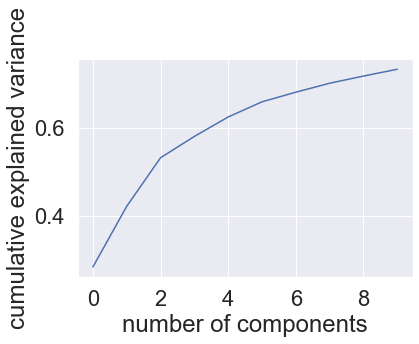

In [23]:
count_components = 10

pca_scaler = StandardScaler()
pca_scaler.fit(Train[cols])
scaled_data = pca_scaler.transform(Train[cols])
pca = PCA(n_components=count_components)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
Train['new_feat_1']  = x_pca[:, 0]
Train['new_feat_2']  = x_pca[:, 1]
Train['new_feat_3']  = x_pca[:, 2]
Train['new_feat_4']  = x_pca[:, 3]
Train['new_feat_5']  = x_pca[:, 4]
Train['new_feat_6']  = x_pca[:, 5]
Train['new_feat_7']  = x_pca[:, 6]
Train['new_feat_8']  = x_pca[:, 7]
Train['new_feat_9']  = x_pca[:, 8]
Train['new_feat_10'] = x_pca[:, 9]

cols_pca = sorted(Train.columns[-count_components:].tolist())
cols_pca.append('BACKPRICE')

In [27]:
Train[cols_pca].head()

,new_feat_1,new_feat_10,new_feat_2,new_feat_3,new_feat_4,new_feat_5,new_feat_6,new_feat_7,new_feat_8,new_feat_9,BACKPRICE
115422,-3.757411,-0.748720,1.288252,-1.222119,2.010922,-2.384723,-0.141866,-0.628967,0.483315,-0.518573,25.0
24678,4.295782,0.104396,-2.538194,-1.576248,1.671030,-1.188853,0.961598,0.307399,-1.461437,-0.131494,36.0
123091,1.022165,2.677498,1.276801,-0.449915,-0.475573,-1.381142,-1.464993,0.603543,0.461817,1.328632,10.0
125465,-1.879307,2.397081,1.785161,-0.783304,-1.025585,-1.247736,0.670800,1.234179,1.500909,-1.714534,19.5
113157,-0.789578,-0.116069,1.545423,-0.824212,-0.524344,-0.003763,-1.174157,-0.410126,-1.522719,-0.048297,11.0


In [28]:
Train['backprice'] = Train.BACKPRICE

In [29]:
Train.head()

,Unnamed: 0,RACE_TRACK,MARKETID,SELECTIONID,RUNNER_NAME,RACE_START_TIME,LIVE_RACE_STATUS,MEETING_ID,RACE_NAME,RACE_DISTANCE,RACE_TYPE,RACE_ID,RACE_STATUS,DAYS_SINCE_LAST_RUN,SEX_TYPE,AGE,SORT_PRIORITY,JOCKEY_NAME,TRAINER_NAME,OWNER_NAME,HORSE_FORM,LAST_RACE,SECOND_LAST_RACE,LAST_TWO_RACES,WEIGHT_VALUE,WEIGHT_UNITS,JOCKEY_CLAIM,WEARING,OFFICIAL_RATING,FORECASTPRICE_DENOMINATOR,FORECASTPRICE_NUMERATOR,SIRE_NAME,SIRE_YEAR_BORN,SIRE_BRED,DAM_NAME,DAM_BRED,DAM_YEAR_BORN,DAMSIRE_NAME,DAMSIRE_YEAR_BORN,DAMSIRE_BRED,STALL_DRAW,ADJUSTED_RATING,CLOTH_NUMBER_ALPHA,COLOURS_DESCRIPTION,CLOTH_NUMBER,COLOUR_TYPE,BRED,RUNNERID,HORSE_RESULT,PROPENSITY,PROPENSITY_RANKING,NUMBEROFWINNERS,NUMBEROFRUNNERS,NUMBEROFACTIVERUNNERS,LASTMATCHTIME,TOTAL_MATCHED_ON_RACE,TOTAL_MATCHED_ON_RUNNER,TOTALAVAILABLE,HANDICAP,RUNNER_STATUS,LASTPRICETRADED,BACKPRICE,LAYPRICE,TIME_OF_CHECK,HORSE_RANKING_BY_PRICE,PRICE_60_MINS_OUT,PRICE_45_MINS_OUT,PRICE_40_MINS_OUT,PRICE_30_MINS_OUT,PRICE_20_MINS_OUT,PRICE_10_MINS_OUT,PRICE_5_MINS_OUT,PRICE_1_MIN_OUT,PRICE_2_SECS_OUT,PCT_PRICE_CHANGE_60M_TO_2S,PCT_PRICE_CHANGE_45M_TO_2S,PCT_PRICE_CHANGE_40M_TO_2S,PCT_PRICE_CHANGE_30M_TO_2S,PCT_PRICE_CHANGE_20M_TO_2S,PCT_PRICE_CHANGE_10M_TO_2S,PCT_PRICE_CHANGE_5M_TO_2S,PCT_PRICE_CHANGE_1M_TO_2S,PRICE_MOVEMENT_SIGNIFICANCE,PMS_RANKING,PRICE_RANKING_AT_RACE_START,AMT_BACKED_60_MINS_OUT,AMT_BACKED_45_MINS_OUT,AMT_BACKED_40_MINS_OUT,AMT_BACKED_30_MINS_OUT,AMT_BACKED_20_MINS_OUT,AMT_BACKED_10_MINS_OUT,AMT_BACKED_5_MINS_OUT,AMT_BACKED_1_MIN_OUT,AMT_BACKED_2_SECS_OUT,PCT_AMT_BACKED_60_MINS_OUT,PCT_AMT_BACKED_45_MINS_OUT,PCT_AMT_BACKED_40_MINS_OUT,PCT_AMT_BACKED_30_MINS_OUT,PCT_AMT_BACKED_20_MINS_OUT,PCT_AMT_BACKED_10_MINS_OUT,PCT_AMT_BACKED_5_MINS_OUT,PCT_AMT_BACKED_1_MIN_OUT,PCT_AMT_BACKED_2_SECS_OUT,PCT_CHANGE_AMT_60M_TO_2S,PCT_CHANGE_AMT_45M_TO_2S,PCT_CHANGE_AMT_40M_TO_2S,PCT_CHANGE_AMT_30M_TO_2S,PCT_CHANGE_AMT_20M_TO_2S,PCT_CHANGE_AMT_10M_TO_2S,PCT_CHANGE_AMT_5M_TO_2S,PCT_CHANGE_AMT_1M_TO_2S,SC_1_JOCKEY,SC_2_PCT_PRICE_CH_1M_TO_2S,SC_3_PCT_BACKED_2_SECS_OUT,SC_4_PCT_CH_AMT_60M_TO_2S,SC_5_PCT_CH_AMT_45M_TO_2S,SC_6_PCT_CH_AMT_40M_TO_2S,SC_7_PCT_CH_AMT_30M_TO_2S,SC_8_PCT_CH_AMT_20M_TO_2S,SC_9_PCT_CH_AMT_10M_TO_2S,SC_10_PCT_CH_AMT_5M_TO_2S,SC_11_PCT_CH_AMT_1M_TO_2S,SC_12_RACE_TRACK,SC_13_RACE_NAME,SC_14_DISTANCE,SC_15_RACE_TYPE,SC_16_DAYS_SINCE_LAST_RUN,SC_17_SEX_TYPE,SC_18_AGE,SC_19_TRAINER,SC_20_OWNER,SC_21_LAST_RACE,SC_22_LAST_TWO_RACES,SC_23_WEIGHT_VALUE,SC_24_JOCKEY_CLAIM,SC_25_WEARING,SC_26_OFFICIAL_RATING,SC_27_SIRE_NAME,SC_28_SIRE_YEAR_BORN,SC_29_SIRE_BRED,SC_30_DAM_NAME,SC_31_DAM_BRED,SC_32_DAM_YEAR_BORN,SC_33_DAMSIRE_NAME,SC_34_DAMSIRE_YEAR_BORN,SC_35_DAMSIRE_BRED,SC_36_STALL_DRAW,SC_37_ADJUSTED_RATING,SC_38_BRED,SC_39_OWNER_TRAINER,...,SC_53_WLR_RANKING,SC_54_WLR_RANKING,SC_55_WLR_RANKING,SC_56_WLR_RANKING,SC_57_WLR_RANKING,SC_58_WLR_RANKING,SC_59_WLR_RANKING,SC_60_WLR_RANKING,SC_61_WLR_RANKING,SC_62_WLR_RANKING,SC_63_WLR_RANKING,SC_64_WLR_RANKING,SC_65_WLR_RANKING,SC_66_WLR_RANKING,SC_67_WLR_RANKING,SC_68_WLR_RANKING,SC_69_WLR_RANKING,SC_70_WLR_RANKING,WLR_RANKINGS_TOTAL,WLR_RANKINGS_RANKING,SUM_OF_ALL_RANKINGS,PRODUCT_OF_ALL_RANKINGS,SUM_OF_ALL_RANKINGS_RANKING,PROD_OF_ALL_RANKINGS_RANKING,OFFICIAL_RATING_RANKING,EXPERIENCE,EXPERIENCE_RANKING,SC_1_NUM_SAMPLES_RANKING,SC_2_NUM_SAMPLES_RANKING,SC_3_NUM_SAMPLES_RANKING,SC_4_NUM_SAMPLES_RANKING,SC_5_NUM_SAMPLES_RANKING,SC_6_NUM_SAMPLES_RANKING,SC_7_NUM_SAMPLES_RANKING,SC_8_NUM_SAMPLES_RANKING,SC_9_NUM_SAMPLES_RANKING,SC_10_NUM_SAMPLES_RANKING,SC_11_NUM_SAMPLES_RANKING,SC_12_NUM_SAMPLES_RANKING,SC_13_NUM_SAMPLES_RANKING,SC_14_NUM_SAMPLES_RANKING,SC_15_NUM_SAMPLES_RANKING,SC_16_NUM_SAMPLES_RANKING,SC_17_NUM_SAMPLES_RANKING,SC_18_NUM_SAMPLES_RANKING,SC_19_NUM_SAMPLES_RANKING,SC_20_NUM_SAMPLES_RANKING,SC_21_NUM_SAMPLES_RANKING,SC_22_NUM_SAMPLES_RANKING,SC_23_NUM_SAMPLES_RANKING,SC_24_NUM_SAMPLES_RANKING,SC_25_NUM_SAMPLES_RANKING,SC_26_NUM_SAMPLES_RANKING,SC_27_NUM_SAMPLES_RANKING,SC_28_NUM_SAMPLES_RANKING,SC_29_NUM_SAMPLES_RANKING,SC_30

In [117]:
# hyperparameters
H = 100 # number of hidden layer neurons
batch_size = 5000 # every how many episodes to do a param update?
learning_rate = 1e-2
#gamma = 0.99 # discount factor for reward
decay_rate = 0.19 # decay factor for RMSProp leaky sum of grad^2

bet = 1

# model initialization
D = count_components +1 # input dimensionality: 30 features grid
E = 1 # output dimensionality: 3 campaigns + 1 excluded from all campaigns

#model = {}
model_W1 = np.random.randn(H,D) / np.sqrt(D) # "Xavier" initialization
model_W2 = np.random.randn(E,H) / np.sqrt(H)

grad_buffer_W1 = np.zeros_like(model_W1) # update buffers that add up gradients over a batch
grad_buffer_W2 = np.zeros_like(model_W2) # update buffers that add up gradients over a batch

rmsprop_cache_W1 = np.zeros_like(model_W1) # rmsprop memory
rmsprop_cache_W2 = np.zeros_like(model_W2) # rmsprop memory

#observation = sub_feats #  env.reset()
xs,hs,dlogps,drs = [],[],[],[]
running_reward = None
reward_sum = 0
episode_number = 0

episodes = 100  # int(0.1 * len(Train)/batch_size)

running_reward_list = []
reward_list = []
action_list = []


ep_list = list(range(0,episodes))
batch_list = list(range(0,int(episodes)))

for N in range(episodes):
    sam_Train = Train.sample(n=batch_size)
    arr_ST = np.asarray(sam_Train)
    start = time.time()
    aprob_list = []
    
    for i in range(batch_size):

        # old allocation of customer to campaign
        # append 0 to stand in for no campaign
        #c = np.append((arr_ST[i, 285:285+E-1].astype(float))-0,-1)  # negaive reward for mismatch and allocation to no campaign
        
        # forward the policy network and sample an action from the returned probability
        aprob, h = policy_forward(arr_ST[i, -count_components-1:])
        exps = [np.exp(prob) for prob in aprob]
        sum_of_exps = sum(exps)
        softmax = np.asarray([j/sum_of_exps for j in exps])
        #one_hot = (aprob == aprob.max(keepdims=True)).astype(int) # one_hot vector describing campaign choice
        action = 0 if np.random.uniform() < aprob else 1 # roll the dice!
        
        aprob_list.append(action)
        
        reward = (action * bet * arr_ST[i,60]-1 * arr_ST[i, 567]) + (action * bet * -1 * arr_ST[i, 565])
        
        
        # record various intermediates (needed later for backprop)
        xs.append(arr_ST[i, -count_components-1:]) # observation
        hs.append(h) # hidden state
        #y = 1 if action == 1 else 0 # a "fake label"
        dlogps.append(action - softmax) # grad that encourages the action that was taken to be taken (see http://cs231n.github.io/neural-networks-2/#losses if confused)

        # step the environment and get new measurements
        reward_sum += reward
        drs.append(reward) # record reward (has to be done after we call step() to get reward for previous action)
        
        if i % batch_size == batch_size-1:

            #drs = [reward_sum]*200
            # stack together all inputs, hidden states, action gradients, and rewards for this episode
            epx = np.vstack(xs)
            eph = np.vstack(hs)
            epdlogp = np.vstack(dlogps)
            epr = np.vstack(drs)

            xs,hs,dlogps,drs = [],[],[],[] # reset array memory

            # standardize the rewards to be unit normal (helps control the gradient estimator variance)
            epr -= np.mean(epr)
            epr /= np.std(epr)

            epdlogp *= epr # modulate the gradient with advantage (PG magic happens right here.)

            grad = policy_backward(eph, epdlogp)

            grad_buffer_W1 += grad[0].astype(float) # accumulate grad over batch
            grad_buffer_W2 += grad[1].astype(float) # accumulate grad over batch

            # perform rmsprop parameter update every batch_size episodes
            g = grad_buffer_W1 # gradient
            rmsprop_cache_W1 = decay_rate * rmsprop_cache_W1 + (1 - decay_rate) * g**2
            model_W1 += learning_rate * g / (np.sqrt(rmsprop_cache_W1) + 1e-5)
            grad_buffer_W1 = np.zeros_like(model_W1) # reset batch gradient buffer

            g = grad_buffer_W2 # gradient
            rmsprop_cache_W2 = decay_rate * rmsprop_cache_W2 + (1 - decay_rate) * g**2
            model_W2 += learning_rate * g / (np.sqrt(rmsprop_cache_W2) + 1e-5)
            grad_buffer_W2 = np.zeros_like(model_W2) # reset batch gradient buffer

            # boring book-keeping
            running_reward = reward_sum if running_reward is None else running_reward * 0.95 + reward_sum * 0.05
            print ('resetting env. episode reward total was %f. running mean: %f' % (reward_sum, running_reward))
            #if episode_number % 100 == 0: pickle.dump(model, open('save.p', 'wb'))
            running_reward_list.append(running_reward)
            reward_list.append(reward_sum)
            reward_sum = 0
            aprob_sum = np.sum(aprob_list)
        
    
    end = time.time()
    elapsed = end - start
    #print (elapsed, 'elapsed time')
    print (N, 'episode')
    print (aprob_sum, 'aprob')

resetting env. episode reward total was 3685.490000. running mean: 3685.490000
0 episode
750 aprob
resetting env. episode reward total was 1089.760000. running mean: 3555.703500
1 episode
364 aprob
resetting env. episode reward total was 686.360000. running mean: 3412.236325
2 episode
299 aprob
resetting env. episode reward total was 429.820000. running mean: 3263.115509
3 episode
235 aprob
resetting env. episode reward total was 365.930000. running mean: 3118.256233
4 episode
213 aprob
resetting env. episode reward total was 241.750000. running mean: 2974.430922
5 episode
164 aprob
resetting env. episode reward total was 167.680000. running mean: 2834.093376
6 episode
137 aprob
resetting env. episode reward total was 136.320000. running mean: 2699.204707
7 episode
130 aprob
resetting env. episode reward total was 102.840000. running mean: 2569.386471
8 episode
96 aprob
resetting env. episode reward total was 98.770000. running mean: 2445.855648
9 episode
89 aprob
resetting env. episod

resetting env. episode reward total was 300.800000. running mean: 189.763672
85 episode
187 aprob
resetting env. episode reward total was 288.860000. running mean: 194.718489
86 episode
192 aprob
resetting env. episode reward total was 236.420000. running mean: 196.803564
87 episode
184 aprob
resetting env. episode reward total was 357.630000. running mean: 204.844886
88 episode
217 aprob
resetting env. episode reward total was 306.740000. running mean: 209.939642
89 episode
214 aprob
resetting env. episode reward total was 360.960000. running mean: 217.490660
90 episode
215 aprob
resetting env. episode reward total was 354.140000. running mean: 224.323127
91 episode
234 aprob
resetting env. episode reward total was 356.650000. running mean: 230.939470
92 episode
225 aprob
resetting env. episode reward total was 366.440000. running mean: 237.714497
93 episode
235 aprob
resetting env. episode reward total was 415.200000. running mean: 246.588772
94 episode
269 aprob
resetting env. episo

In [118]:
batch_list = list(range(0,int(N+1)))

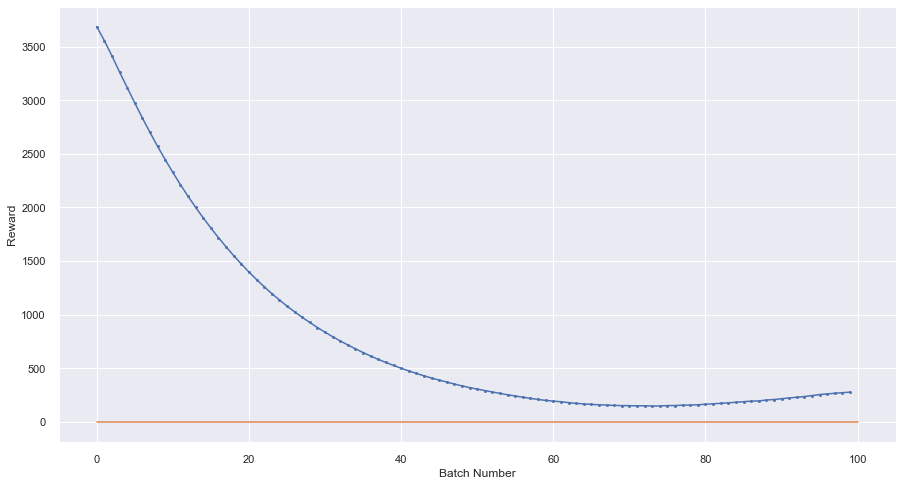

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, running_reward_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Batch Number")
plt.ylabel("Reward")
_ = plt.plot([0, len(batch_list)], [0, 0])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

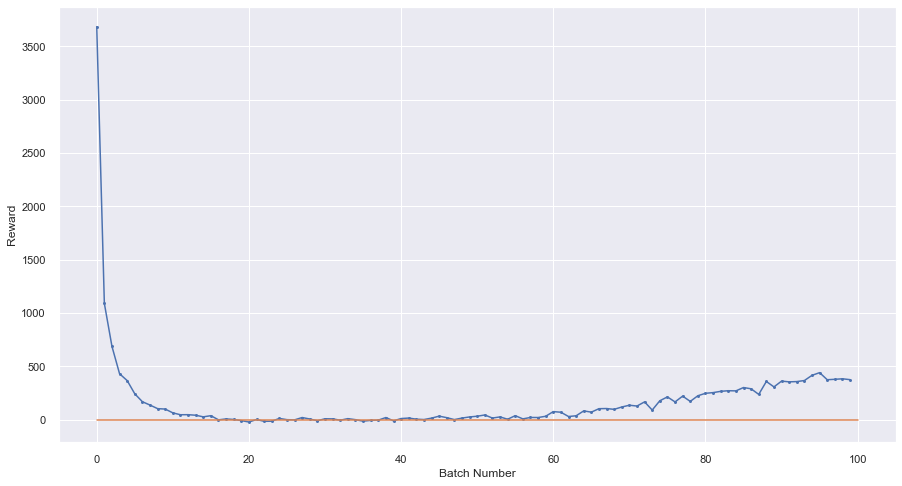

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(batch_list, reward_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Batch Number")
plt.ylabel("Reward")
_ = plt.plot([0, len(batch_list)], [0, 0])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [121]:
reward_in_list = []
reward_out_list = []
reward_all_list = []

bet = 1
for i in range(200):
    reward_sum_in = 0
    reward_sum_out = 0
    reward_sum_all = 0

    sam_Test = Train.sample(n=4000)

### Exclude outliers ########### Exclude outliers ########### Exclude outliers ########### Exclude outliers ########


    sam_Test['allocation'] = sam_Test.apply(lambda row: allocator(row['new_feat_1'],row['new_feat_2'],row['new_feat_3'],\
                                                          row['new_feat_4'],row['new_feat_5'],row['new_feat_6'],\
                                                          row['new_feat_7'],row['new_feat_8'],row['new_feat_9'],\
                                                          row['new_feat_10'], row['BACKPRICE']), axis=1)



    in_df =     sam_Test[(sam_Test['allocation'] == 1)]
    out_df =    sam_Test[(sam_Test['allocation'] == 0)]


    for j in range(len(in_df)):
        reward_in = (bet * (in_df.BACKPRICE.iloc[j]-1) * in_df.WINNER.iloc[j]) + (bet * -1 * in_df.LOSER.iloc[j])     
        reward_sum_in += reward_in
        
    for j in range(len(out_df)):
        reward_out = (bet * (out_df.BACKPRICE.iloc[j]-1) * out_df.WINNER.iloc[j]) + (bet * -1 * out_df.LOSER.iloc[j])
        reward_sum_out += reward_out
        
        
    for j in range(len(sam_Test)):
        reward_all = (bet * (sam_Test.BACKPRICE.iloc[j]-1) * sam_Test.WINNER.iloc[j]) + (bet * -1 * sam_Test.LOSER.iloc[j])     
        reward_sum_all += reward_all
        

    reward_in_list.append(reward_sum_in)
    reward_out_list.append(reward_sum_out)
    reward_all_list.append(reward_sum_all)



    if i % 10 == 0:
        print ('episode number', i)


print ('done')

episode number 0
episode number 10
episode number 20
episode number 30
episode number 40
episode number 50
episode number 60
episode number 70
episode number 80
episode number 90
episode number 100
episode number 110
episode number 120
episode number 130
episode number 140
episode number 150
episode number 160
episode number 170
episode number 180
episode number 190
done


2.3177
16.404173393072874


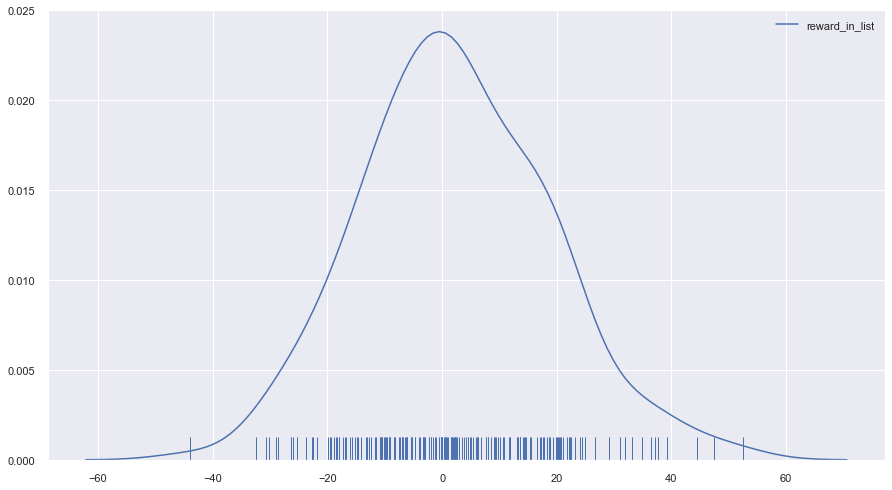

In [122]:
print (np.mean(reward_in_list))
print (np.std(reward_in_list))
sns.distplot(reward_in_list, hist=False, rug=True, label='reward_in_list')

# would be interesting to see the cumsum of the rewards as its generated

In [126]:
scaled_data = pca_scaler.transform(Test[cols])
pca = PCA(n_components=count_components)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [127]:
Test['new_feat_1'] = x_pca[:, 0]
Test['new_feat_2'] = x_pca[:, 1]
Test['new_feat_3'] = x_pca[:, 2]
Test['new_feat_4'] = x_pca[:, 3]
Test['new_feat_5'] = x_pca[:, 4]
Test['new_feat_6'] = x_pca[:, 5]
Test['new_feat_7'] = x_pca[:, 6]
Test['new_feat_8'] = x_pca[:, 7]
Test['new_feat_9'] = x_pca[:, 8]
Test['new_feat_10'] = x_pca[:, 9]


#cols_pca = sorted(Test.columns[-count_components:].tolist())

In [128]:
Test[cols_pca].head()

,new_feat_1,new_feat_10,new_feat_2,new_feat_3,new_feat_4,new_feat_5,new_feat_6,new_feat_7,new_feat_8,new_feat_9,BACKPRICE
92898,-6.846812,-0.677945,1.836452,-1.556996,0.574283,2.544997,1.114996,-0.615852,0.850766,-0.375010,95.00
77860,-0.717550,-0.748912,-0.469329,-0.488317,-0.971115,3.438611,-0.154535,-0.893110,0.286904,-0.114915,34.00
87387,0.102263,-0.177549,-0.620776,-1.403831,-1.748876,1.194779,1.552889,-0.511599,-0.245129,1.373104,10.50
25159,4.791830,0.272953,-2.069563,0.969653,2.046780,-1.334156,1.231291,0.541912,-1.732818,-1.340582,3.15
102572,-1.155988,1.129823,0.026842,-1.754280,-1.818080,-1.886278,0.714989,-0.068202,-0.311439,0.416328,14.00


In [129]:
Test['backprice'] = Test.BACKPRICE

In [130]:
Test.head()

,Unnamed: 0,RACE_TRACK,MARKETID,SELECTIONID,RUNNER_NAME,RACE_START_TIME,LIVE_RACE_STATUS,MEETING_ID,RACE_NAME,RACE_DISTANCE,RACE_TYPE,RACE_ID,RACE_STATUS,DAYS_SINCE_LAST_RUN,SEX_TYPE,AGE,SORT_PRIORITY,JOCKEY_NAME,TRAINER_NAME,OWNER_NAME,HORSE_FORM,LAST_RACE,SECOND_LAST_RACE,LAST_TWO_RACES,WEIGHT_VALUE,WEIGHT_UNITS,JOCKEY_CLAIM,WEARING,OFFICIAL_RATING,FORECASTPRICE_DENOMINATOR,FORECASTPRICE_NUMERATOR,SIRE_NAME,SIRE_YEAR_BORN,SIRE_BRED,DAM_NAME,DAM_BRED,DAM_YEAR_BORN,DAMSIRE_NAME,DAMSIRE_YEAR_BORN,DAMSIRE_BRED,STALL_DRAW,ADJUSTED_RATING,CLOTH_NUMBER_ALPHA,COLOURS_DESCRIPTION,CLOTH_NUMBER,COLOUR_TYPE,BRED,RUNNERID,HORSE_RESULT,PROPENSITY,PROPENSITY_RANKING,NUMBEROFWINNERS,NUMBEROFRUNNERS,NUMBEROFACTIVERUNNERS,LASTMATCHTIME,TOTAL_MATCHED_ON_RACE,TOTAL_MATCHED_ON_RUNNER,TOTALAVAILABLE,HANDICAP,RUNNER_STATUS,LASTPRICETRADED,BACKPRICE,LAYPRICE,TIME_OF_CHECK,HORSE_RANKING_BY_PRICE,PRICE_60_MINS_OUT,PRICE_45_MINS_OUT,PRICE_40_MINS_OUT,PRICE_30_MINS_OUT,PRICE_20_MINS_OUT,PRICE_10_MINS_OUT,PRICE_5_MINS_OUT,PRICE_1_MIN_OUT,PRICE_2_SECS_OUT,PCT_PRICE_CHANGE_60M_TO_2S,PCT_PRICE_CHANGE_45M_TO_2S,PCT_PRICE_CHANGE_40M_TO_2S,PCT_PRICE_CHANGE_30M_TO_2S,PCT_PRICE_CHANGE_20M_TO_2S,PCT_PRICE_CHANGE_10M_TO_2S,PCT_PRICE_CHANGE_5M_TO_2S,PCT_PRICE_CHANGE_1M_TO_2S,PRICE_MOVEMENT_SIGNIFICANCE,PMS_RANKING,PRICE_RANKING_AT_RACE_START,AMT_BACKED_60_MINS_OUT,AMT_BACKED_45_MINS_OUT,AMT_BACKED_40_MINS_OUT,AMT_BACKED_30_MINS_OUT,AMT_BACKED_20_MINS_OUT,AMT_BACKED_10_MINS_OUT,AMT_BACKED_5_MINS_OUT,AMT_BACKED_1_MIN_OUT,AMT_BACKED_2_SECS_OUT,PCT_AMT_BACKED_60_MINS_OUT,PCT_AMT_BACKED_45_MINS_OUT,PCT_AMT_BACKED_40_MINS_OUT,PCT_AMT_BACKED_30_MINS_OUT,PCT_AMT_BACKED_20_MINS_OUT,PCT_AMT_BACKED_10_MINS_OUT,PCT_AMT_BACKED_5_MINS_OUT,PCT_AMT_BACKED_1_MIN_OUT,PCT_AMT_BACKED_2_SECS_OUT,PCT_CHANGE_AMT_60M_TO_2S,PCT_CHANGE_AMT_45M_TO_2S,PCT_CHANGE_AMT_40M_TO_2S,PCT_CHANGE_AMT_30M_TO_2S,PCT_CHANGE_AMT_20M_TO_2S,PCT_CHANGE_AMT_10M_TO_2S,PCT_CHANGE_AMT_5M_TO_2S,PCT_CHANGE_AMT_1M_TO_2S,SC_1_JOCKEY,SC_2_PCT_PRICE_CH_1M_TO_2S,SC_3_PCT_BACKED_2_SECS_OUT,SC_4_PCT_CH_AMT_60M_TO_2S,SC_5_PCT_CH_AMT_45M_TO_2S,SC_6_PCT_CH_AMT_40M_TO_2S,SC_7_PCT_CH_AMT_30M_TO_2S,SC_8_PCT_CH_AMT_20M_TO_2S,SC_9_PCT_CH_AMT_10M_TO_2S,SC_10_PCT_CH_AMT_5M_TO_2S,SC_11_PCT_CH_AMT_1M_TO_2S,SC_12_RACE_TRACK,SC_13_RACE_NAME,SC_14_DISTANCE,SC_15_RACE_TYPE,SC_16_DAYS_SINCE_LAST_RUN,SC_17_SEX_TYPE,SC_18_AGE,SC_19_TRAINER,SC_20_OWNER,SC_21_LAST_RACE,SC_22_LAST_TWO_RACES,SC_23_WEIGHT_VALUE,SC_24_JOCKEY_CLAIM,SC_25_WEARING,SC_26_OFFICIAL_RATING,SC_27_SIRE_NAME,SC_28_SIRE_YEAR_BORN,SC_29_SIRE_BRED,SC_30_DAM_NAME,SC_31_DAM_BRED,SC_32_DAM_YEAR_BORN,SC_33_DAMSIRE_NAME,SC_34_DAMSIRE_YEAR_BORN,SC_35_DAMSIRE_BRED,SC_36_STALL_DRAW,SC_37_ADJUSTED_RATING,SC_38_BRED,SC_39_OWNER_TRAINER,...,SC_53_WLR_RANKING,SC_54_WLR_RANKING,SC_55_WLR_RANKING,SC_56_WLR_RANKING,SC_57_WLR_RANKING,SC_58_WLR_RANKING,SC_59_WLR_RANKING,SC_60_WLR_RANKING,SC_61_WLR_RANKING,SC_62_WLR_RANKING,SC_63_WLR_RANKING,SC_64_WLR_RANKING,SC_65_WLR_RANKING,SC_66_WLR_RANKING,SC_67_WLR_RANKING,SC_68_WLR_RANKING,SC_69_WLR_RANKING,SC_70_WLR_RANKING,WLR_RANKINGS_TOTAL,WLR_RANKINGS_RANKING,SUM_OF_ALL_RANKINGS,PRODUCT_OF_ALL_RANKINGS,SUM_OF_ALL_RANKINGS_RANKING,PROD_OF_ALL_RANKINGS_RANKING,OFFICIAL_RATING_RANKING,EXPERIENCE,EXPERIENCE_RANKING,SC_1_NUM_SAMPLES_RANKING,SC_2_NUM_SAMPLES_RANKING,SC_3_NUM_SAMPLES_RANKING,SC_4_NUM_SAMPLES_RANKING,SC_5_NUM_SAMPLES_RANKING,SC_6_NUM_SAMPLES_RANKING,SC_7_NUM_SAMPLES_RANKING,SC_8_NUM_SAMPLES_RANKING,SC_9_NUM_SAMPLES_RANKING,SC_10_NUM_SAMPLES_RANKING,SC_11_NUM_SAMPLES_RANKING,SC_12_NUM_SAMPLES_RANKING,SC_13_NUM_SAMPLES_RANKING,SC_14_NUM_SAMPLES_RANKING,SC_15_NUM_SAMPLES_RANKING,SC_16_NUM_SAMPLES_RANKING,SC_17_NUM_SAMPLES_RANKING,SC_18_NUM_SAMPLES_RANKING,SC_19_NUM_SAMPLES_RANKING,SC_20_NUM_SAMPLES_RANKING,SC_21_NUM_SAMPLES_RANKING,SC_22_NUM_SAMPLES_RANKING,SC_23_NUM_SAMPLES_RANKING,SC_24_NUM_SAMPLES_RANKING,SC_25_NUM_SAMPLES_RANKING,SC_26_NUM_SAMPLES_RANKING,SC_27_NUM_SAMPLES_RANKING,SC_28_NUM_SAMPLES_RANKING,SC_29_NUM_SAMPLES_RANKING,SC_30

In [131]:
sam_Test = Test.sample(frac=1)

In [132]:
sam_Test['allocation'] = sam_Test.apply(lambda row: allocator(row['new_feat_1'],row['new_feat_2'],row['new_feat_3'],\
                                                      row['new_feat_4'],row['new_feat_5'],row['new_feat_6'],\
                                                      row['new_feat_7'],row['new_feat_8'],row['new_feat_9'],\
                                                      row['new_feat_10'], row['BACKPRICE']), axis=1)

In [133]:
sam_Test.groupby('allocation').count()

,Unnamed: 0,RACE_TRACK,MARKETID,SELECTIONID,RUNNER_NAME,RACE_START_TIME,LIVE_RACE_STATUS,MEETING_ID,RACE_NAME,RACE_DISTANCE,RACE_TYPE,RACE_ID,RACE_STATUS,DAYS_SINCE_LAST_RUN,SEX_TYPE,AGE,SORT_PRIORITY,JOCKEY_NAME,TRAINER_NAME,OWNER_NAME,HORSE_FORM,LAST_RACE,SECOND_LAST_RACE,LAST_TWO_RACES,WEIGHT_VALUE,WEIGHT_UNITS,JOCKEY_CLAIM,WEARING,OFFICIAL_RATING,FORECASTPRICE_DENOMINATOR,FORECASTPRICE_NUMERATOR,SIRE_NAME,SIRE_YEAR_BORN,SIRE_BRED,DAM_NAME,DAM_BRED,DAM_YEAR_BORN,DAMSIRE_NAME,DAMSIRE_YEAR_BORN,DAMSIRE_BRED,STALL_DRAW,ADJUSTED_RATING,CLOTH_NUMBER_ALPHA,COLOURS_DESCRIPTION,CLOTH_NUMBER,COLOUR_TYPE,BRED,RUNNERID,HORSE_RESULT,PROPENSITY,PROPENSITY_RANKING,NUMBEROFWINNERS,NUMBEROFRUNNERS,NUMBEROFACTIVERUNNERS,LASTMATCHTIME,TOTAL_MATCHED_ON_RACE,TOTAL_MATCHED_ON_RUNNER,TOTALAVAILABLE,HANDICAP,RUNNER_STATUS,LASTPRICETRADED,BACKPRICE,LAYPRICE,TIME_OF_CHECK,HORSE_RANKING_BY_PRICE,PRICE_60_MINS_OUT,PRICE_45_MINS_OUT,PRICE_40_MINS_OUT,PRICE_30_MINS_OUT,PRICE_20_MINS_OUT,PRICE_10_MINS_OUT,PRICE_5_MINS_OUT,PRICE_1_MIN_OUT,PRICE_2_SECS_OUT,PCT_PRICE_CHANGE_60M_TO_2S,PCT_PRICE_CHANGE_45M_TO_2S,PCT_PRICE_CHANGE_40M_TO_2S,PCT_PRICE_CHANGE_30M_TO_2S,PCT_PRICE_CHANGE_20M_TO_2S,PCT_PRICE_CHANGE_10M_TO_2S,PCT_PRICE_CHANGE_5M_TO_2S,PCT_PRICE_CHANGE_1M_TO_2S,PRICE_MOVEMENT_SIGNIFICANCE,PMS_RANKING,PRICE_RANKING_AT_RACE_START,AMT_BACKED_60_MINS_OUT,AMT_BACKED_45_MINS_OUT,AMT_BACKED_40_MINS_OUT,AMT_BACKED_30_MINS_OUT,AMT_BACKED_20_MINS_OUT,AMT_BACKED_10_MINS_OUT,AMT_BACKED_5_MINS_OUT,AMT_BACKED_1_MIN_OUT,AMT_BACKED_2_SECS_OUT,PCT_AMT_BACKED_60_MINS_OUT,PCT_AMT_BACKED_45_MINS_OUT,PCT_AMT_BACKED_40_MINS_OUT,PCT_AMT_BACKED_30_MINS_OUT,PCT_AMT_BACKED_20_MINS_OUT,PCT_AMT_BACKED_10_MINS_OUT,PCT_AMT_BACKED_5_MINS_OUT,PCT_AMT_BACKED_1_MIN_OUT,PCT_AMT_BACKED_2_SECS_OUT,PCT_CHANGE_AMT_60M_TO_2S,PCT_CHANGE_AMT_45M_TO_2S,PCT_CHANGE_AMT_40M_TO_2S,PCT_CHANGE_AMT_30M_TO_2S,PCT_CHANGE_AMT_20M_TO_2S,PCT_CHANGE_AMT_10M_TO_2S,PCT_CHANGE_AMT_5M_TO_2S,PCT_CHANGE_AMT_1M_TO_2S,SC_1_JOCKEY,SC_2_PCT_PRICE_CH_1M_TO_2S,SC_3_PCT_BACKED_2_SECS_OUT,SC_4_PCT_CH_AMT_60M_TO_2S,SC_5_PCT_CH_AMT_45M_TO_2S,SC_6_PCT_CH_AMT_40M_TO_2S,SC_7_PCT_CH_AMT_30M_TO_2S,SC_8_PCT_CH_AMT_20M_TO_2S,SC_9_PCT_CH_AMT_10M_TO_2S,SC_10_PCT_CH_AMT_5M_TO_2S,SC_11_PCT_CH_AMT_1M_TO_2S,SC_12_RACE_TRACK,SC_13_RACE_NAME,SC_14_DISTANCE,SC_15_RACE_TYPE,SC_16_DAYS_SINCE_LAST_RUN,SC_17_SEX_TYPE,SC_18_AGE,SC_19_TRAINER,SC_20_OWNER,SC_21_LAST_RACE,SC_22_LAST_TWO_RACES,SC_23_WEIGHT_VALUE,SC_24_JOCKEY_CLAIM,SC_25_WEARING,SC_26_OFFICIAL_RATING,SC_27_SIRE_NAME,SC_28_SIRE_YEAR_BORN,SC_29_SIRE_BRED,SC_30_DAM_NAME,SC_31_DAM_BRED,SC_32_DAM_YEAR_BORN,SC_33_DAMSIRE_NAME,SC_34_DAMSIRE_YEAR_BORN,SC_35_DAMSIRE_BRED,SC_36_STALL_DRAW,SC_37_ADJUSTED_RATING,SC_38_BRED,SC_39_OWNER_TRAINER,...,SC_53_WLR_RANKING,SC_54_WLR_RANKING,SC_55_WLR_RANKING,SC_56_WLR_RANKING,SC_57_WLR_RANKING,SC_58_WLR_RANKING,SC_59_WLR_RANKING,SC_60_WLR_RANKING,SC_61_WLR_RANKING,SC_62_WLR_RANKING,SC_63_WLR_RANKING,SC_64_WLR_RANKING,SC_65_WLR_RANKING,SC_66_WLR_RANKING,SC_67_WLR_RANKING,SC_68_WLR_RANKING,SC_69_WLR_RANKING,SC_70_WLR_RANKING,WLR_RANKINGS_TOTAL,WLR_RANKINGS_RANKING,SUM_OF_ALL_RANKINGS,PRODUCT_OF_ALL_RANKINGS,SUM_OF_ALL_RANKINGS_RANKING,PROD_OF_ALL_RANKINGS_RANKING,OFFICIAL_RATING_RANKING,EXPERIENCE,EXPERIENCE_RANKING,SC_1_NUM_SAMPLES_RANKING,SC_2_NUM_SAMPLES_RANKING,SC_3_NUM_SAMPLES_RANKING,SC_4_NUM_SAMPLES_RANKING,SC_5_NUM_SAMPLES_RANKING,SC_6_NUM_SAMPLES_RANKING,SC_7_NUM_SAMPLES_RANKING,SC_8_NUM_SAMPLES_RANKING,SC_9_NUM_SAMPLES_RANKING,SC_10_NUM_SAMPLES_RANKING,SC_11_NUM_SAMPLES_RANKING,SC_12_NUM_SAMPLES_RANKING,SC_13_NUM_SAMPLES_RANKING,SC_14_NUM_SAMPLES_RANKING,SC_15_NUM_SAMPLES_RANKING,SC_16_NUM_SAMPLES_RANKING,SC_17_NUM_SAMPLES_RANKING,SC_18_NUM_SAMPLES_RANKING,SC_19_NUM_SAMPLES_RANKING,SC_20_NUM_SAMPLES_RANKING,SC_21_NUM_SAMPLES_RANKING,SC_22_NUM_SAMPLES_RANKING,SC_23_NUM_SAMPLES_RANKING,SC_24_NUM_SAMPLES_RANKING,SC_25_NUM_SAMPLES_RANKING,SC_26_NUM_SAMPLES_RANKING,SC_27_NUM_SAMPLES_RANKING,SC_28_NUM_SAMPLES_RANKING,SC_29_NUM_SAMPLES_RANKING,SC_30

In [134]:
len(Test)

39497

In [135]:
type(sam_Test.allocation.iloc[0])

numpy.int64

In [136]:
reward_in_list = []
reward_out_list = []
reward_all_list = []

bet = 1
for i in range(200):
    reward_sum_in = 0
    reward_sum_out = 0
    reward_sum_all = 0

    sam_Test = Test.sample(n=4000)

### Exclude outliers ########### Exclude outliers ########### Exclude outliers ########### Exclude outliers ########


    sam_Test['allocation'] = sam_Test.apply(lambda row: allocator(row['new_feat_1'],row['new_feat_2'],row['new_feat_3'],\
                                                          row['new_feat_4'],row['new_feat_5'],row['new_feat_6'],\
                                                          row['new_feat_7'],row['new_feat_8'],row['new_feat_9'],\
                                                          row['new_feat_10'], row['BACKPRICE']), axis=1)



    in_df =     sam_Test[(sam_Test['allocation'] == 1)]
    out_df =    sam_Test[(sam_Test['allocation'] == 0)]


    for j in range(len(in_df)):
        reward_in = (bet * (in_df.BACKPRICE.iloc[j]-1) * in_df.WINNER.iloc[j]) + (bet * -1 * in_df.LOSER.iloc[j])     
        reward_sum_in += reward_in
        
    for j in range(len(out_df)):
        reward_out = (bet * (out_df.BACKPRICE.iloc[j]-1) * out_df.WINNER.iloc[j]) + (bet * -1 * out_df.LOSER.iloc[j])
        reward_sum_out += reward_out
        
        
    for j in range(len(sam_Test)):
        reward_all = (bet * (sam_Test.BACKPRICE.iloc[j]-1) * sam_Test.WINNER.iloc[j]) + (bet * -1 * sam_Test.LOSER.iloc[j])     
        reward_sum_all += reward_all
        

    reward_in_list.append(reward_sum_in)
    reward_out_list.append(reward_sum_out)
    reward_all_list.append(reward_sum_all)



    if i % 10 == 0:
        print ('episode number', i)


print ('done')

episode number 0
episode number 10
episode number 20
episode number 30
episode number 40
episode number 50
episode number 60
episode number 70
episode number 80
episode number 90
episode number 100
episode number 110
episode number 120
episode number 130
episode number 140
episode number 150
episode number 160
episode number 170
episode number 180
episode number 190
done


In [137]:
sns.set(rc={'figure.figsize':(15,8.27)})

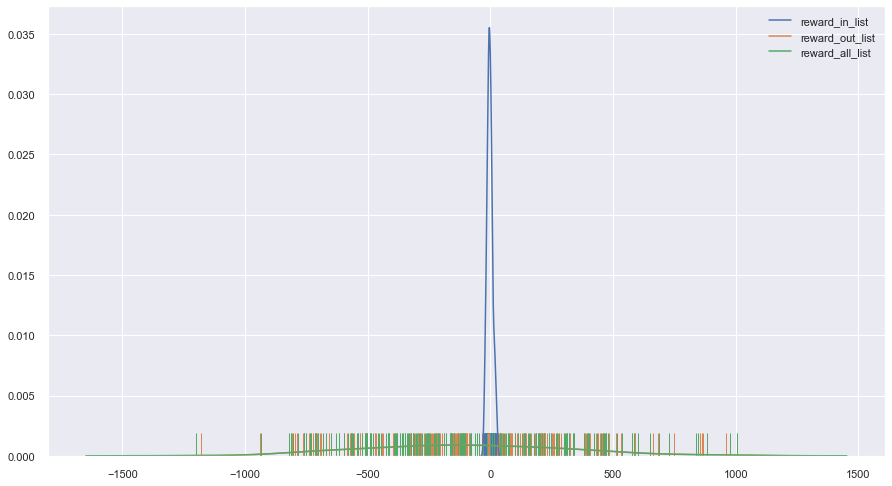

In [138]:
sns.distplot(reward_in_list, hist=False, rug=True, label='reward_in_list')
sns.distplot(reward_out_list, hist=False, rug=True, label='reward_out_list')
sns.distplot(reward_all_list, hist=False, rug=True, label='reward_all_list')

-2.2026499999999998
11.294452464705847


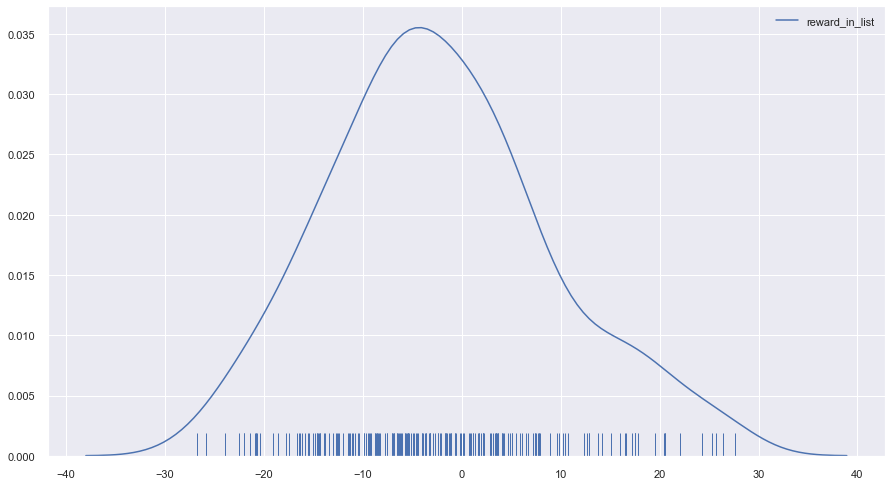

In [139]:
print (np.mean(reward_in_list))
print (np.std(reward_in_list))
sns.distplot(reward_in_list, hist=False, rug=True, label='reward_in_list')

-95.91595000000005
405.58918916940763


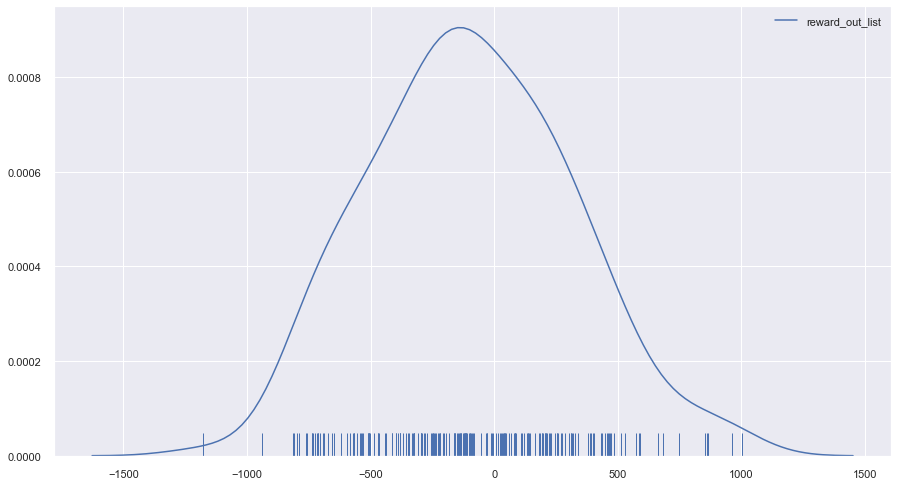

In [140]:
print (np.mean(reward_out_list))
print (np.std(reward_out_list))
sns.distplot(reward_out_list, hist=False, rug=True, label='reward_out_list')

-98.11860000000003
407.01513930938745


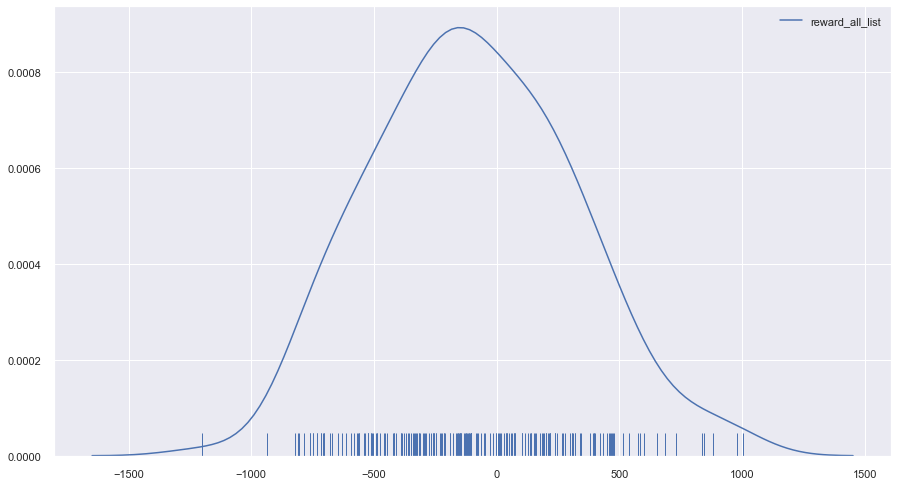

In [141]:
print (np.mean(reward_all_list))
print (np.std(reward_all_list))
sns.distplot(reward_all_list, hist=False, rug=True, label='reward_all_list')